In [12]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
img = cv2.imread("dataset/Muller/Muller-15.jpg")
img.shape

(359, 640, 3)

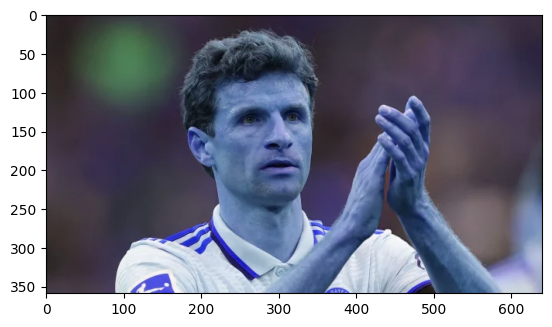

In [14]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[ 40,  40,  40, ...,  53,  53,  53],
       [ 40,  40,  40, ...,  53,  53,  53],
       [ 40,  40,  40, ...,  53,  53,  53],
       ...,
       [ 65,  65,  65, ..., 179, 179, 179],
       [ 65,  65,  65, ..., 180, 179, 179],
       [ 65,  65,  65, ..., 181, 179, 179]], shape=(359, 640), dtype=uint8)

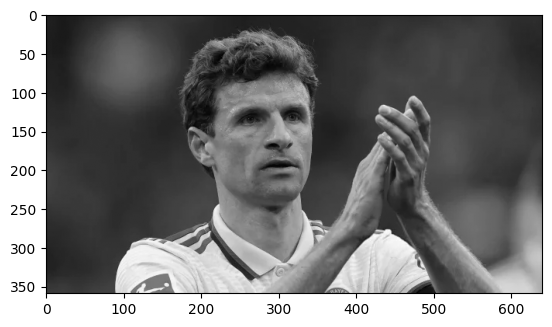

In [16]:
plt.imshow(gray, cmap = "gray")

In [17]:
face_cascade = cv2.CascadeClassifier("opencv/haarcascade/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("opencv/haarcascade/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[219,  72, 155, 155]], dtype=int32)

In [18]:
(x,y,w,h) = faces[0]

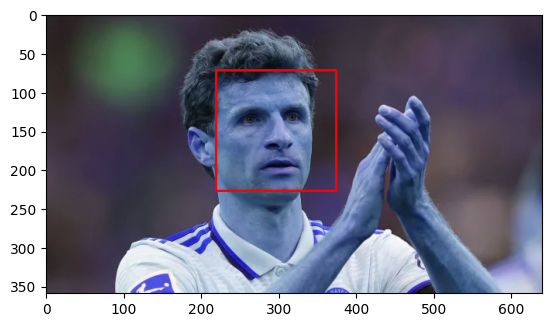

In [19]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

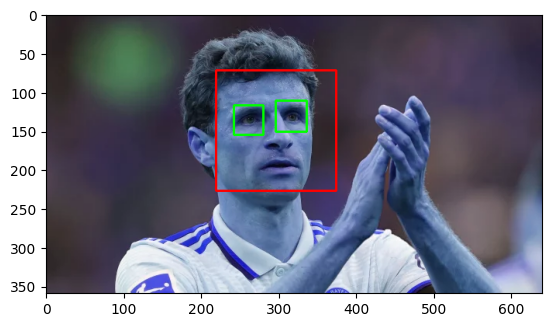

In [20]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

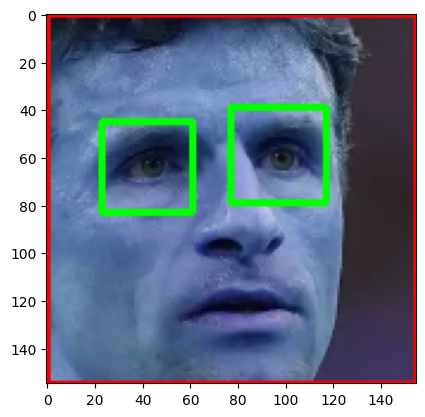

In [21]:
plt.imshow(roi_color, cmap = "gray")

# Cropping based on FACE and EYE

In [22]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [23]:
path_to_data = "dataset/"
path_to_cr_data = "dataset/cropped/"

In [24]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [25]:
img_dirs

['dataset/cropped',
 'dataset/Lewandowski',
 'dataset/Messi',
 'dataset/Muller',
 'dataset/Neuer',
 'dataset/Ronaldo']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [27]:
img_dirs

['dataset/cropped',
 'dataset/Lewandowski',
 'dataset/Messi',
 'dataset/Muller',
 'dataset/Neuer',
 'dataset/Ronaldo']

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count  = 1
    name = img_dir.split('/')[-1]
    celebrity_file_names_dict[name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder", cropped_folder)

            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[name].append(cropped_file_path)
            count += 1

print("Finished cropping images")
            

Generating cropped images in folder dataset/cropped/Lewandowski
Failed to load image: dataset/Lewandowski\Lewandowski-34.jpg
Failed to load image: dataset/Lewandowski\Lewandowski-53.jpg
Failed to load image: dataset/Lewandowski\Lewandowski-58.png
Failed to load image: dataset/Lewandowski\Lewandowski-90.jpg
Generating cropped images in folder dataset/cropped/Messi
Generating cropped images in folder dataset/cropped/Muller
Failed to load image: dataset/Muller\Muller-13.png
Failed to load image: dataset/Muller\Muller-2.jpg
Failed to load image: dataset/Muller\Muller-56.png
Generating cropped images in folder dataset/cropped/Neuer
Generating cropped images in folder dataset/cropped/Ronaldo
Finished cropping images


# Preprocessing

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

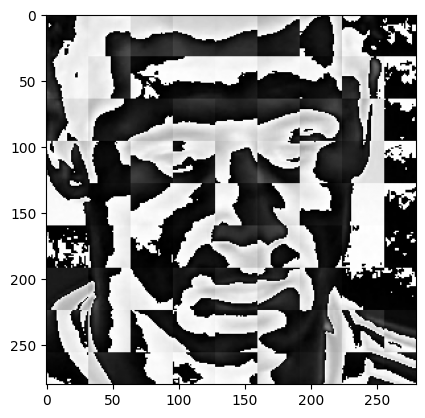

In [30]:
cropped_img = cv2.imread("dataset/cropped/Lewandowski/Lewandowski10.png")
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict

In [33]:
class_dict = {}

count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1

class_dict

{'cropped': 0,
 'Lewandowski': 1,
 'Messi': 2,
 'Muller': 3,
 'Neuer': 4,
 'Ronaldo': 5}

In [34]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32, 1)))

        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [36]:
len(X[0])

4096

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(153, 4096)

# Training the model

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7692307692307693

In [41]:
len(X_test

39

In [51]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           1       0.44      0.80      0.57         5
           2       0.86      0.86      0.86         7
           3       0.67      0.86      0.75         7
           4       1.00      0.77      0.87        13
           5       1.00      0.57      0.73         7

    accuracy                           0.77        39
   macro avg       0.79      0.77      0.76        39
weighted avg       0.84      0.77      0.78        39



# Grid Search

In [59]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [61]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

,model,best_score,best_params
0,svm,0.719368,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.439526,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.753755,{'logisticregression__C': 1}


In [62]:
best_estimators['svm'].score(X_test,y_test)

0.7692307692307693

In [63]:
best_estimators['random_forest'].score(X_test,y_test)

0.5641025641025641

In [64]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7435897435897436

In [65]:
best_clf = best_estimators['logistic_regression']

# Save the model

In [67]:
import joblib
joblib.dump(best_clf, "saved_mode.pkl")

['saved_mode.pkl']

In [68]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))